# **Iris Flower Classification**

## **Overview**

Within this project on the classic data science iris flower dataset, we want to **predict the species of an iris flower**—*setosa*, *versicolor*, or *virginica*—using only four easily measured traits:
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

Because the true species labels are known, this is a **supervised, three-class classification** task. This project will explore many key questions and employ various data science techniques including: 

1. **Separability** – Do these measurements cleanly distinguish the three species?  
2. **Model choice** – How does our logistic regression model compare to our simple manual model?
3. **Generalisation** – How well does a trained model perform on unseen data?  

Our end-goal is to create a model that is both **accurate** and **consistent**, which can be relied upon to distinguish between the iris species' in question.

## **Environment & Library Setup**

To begin this project, I first activated **Jupyter Notebooks** locally through **Windows Command Prompt**, keeping my work stored in a *repeatable and easy-to-find location*.
Following this, I import the **core python stack** and **scikit-learn's built-in dataset bundle** - which includes the iris flower dataset this project is centred around. 
Lastly, I make sure to apply **Seaborn** as my default theme so that the figures I will utilise later in the project will be *readable without additional styling code*.

In [20]:
# Jupyter setup commands
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
# Import our third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [22]:
# Applying Seaborn's default theme for subsequent Matplotlib plots
sns.set()

## **Loading the Dataset**

In this section, I load the readymade dataset from scikit-learn's collection and briefly look into its contents. Processes which I undertake include:
1. **.keys** provides use with the fields within the bunch
2. **DESCR** gives a detailed description of the dataset, including when it was created and who by.

We also in this section convert our **NumPy array** into a **pandas DataFrame**. This makes our dataset *easier to interpret* throughout the processes of EDA, cleaning, and visualisation, minimising errors and maximising efficiency.

In [23]:
# Load our dataset from scikit-learn
data = datasets.load_iris()

In [24]:
# Take a look at the labels which are used to define our data
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
# Peek into the description of this dataset and project
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
# Look at the species names of iris flowers that we are distinguishing
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
# View of the species names in terms of their integer codes
data["target"]

# 0 for 'setosa', 1 for 'versicolor', 2 for 'virginica'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Converting our numeric array into a pandas DataFrame
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [29]:
# Append the target column onto our new DataFrame
df["target"] = data["target"]

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Basic Descriptive Statistics**

The purpose of this section is to answer the two required understandings before moving onto **multivariate relationships**. By this, we need to specifically find:
1. Each feature's **count**, **mean**, **spread (std)**, and **min-max**. Doing this will give us a better understanding of our dataset, allowing us to flag unrealistic values and determine outliers.
2. The **distribution of each measure** in the form of a 2x2 grid of histograms which allow me to very simply visually interpret how different features overlap and differ - which will become crucial in the following step.

In [31]:
# A tabular representation of our data allowing us to measure count, mean, and spread
df.describe().T

# It can be noted that petal length and petal width have much larger relative spreads than the sepal related features.
# This provides direction into our multivariate analysis we will do after 

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [32]:
# Confirmation of our column names to ensure our loops use exactly the correct labels.
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


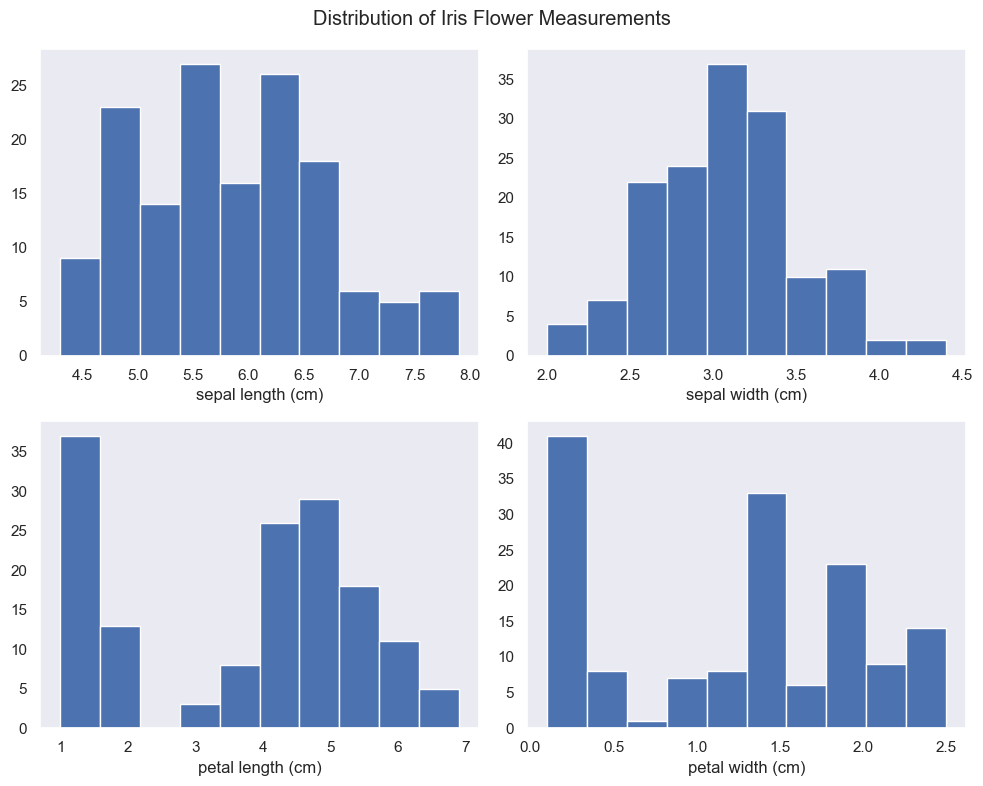

In [33]:
# Creation of a 2x2 grid for our simple histogram plots
cols = ["sepal length (cm)", "sepal width (cm)", 
        "petal length (cm)", "petal width (cm)"]
axes = df[cols].hist(layout=(2, 2), figsize=(10, 8), grid=False)

# Loop for our feature names to create a plot of each within our pre-defined grid
for ax, col in zip(axes.ravel(), cols):
    ax.set_xlabel(col)        
    ax.set_title("")          

# Create a title for our plot and prevent labels from overlapping
plt.suptitle("Distribution of Iris Flower Measurements")
plt.tight_layout()
plt.show()

From these histograms, we can make the following observations:
1. **Sepal length:** roughly bell shaped, centerd near 5.8cm with no obvious outliers.
2. **Sepal width:** tighter and more Gaussian spread than that of sepal length, centred around 3.25cm with a thinner right-sided tail suggesting that some wide outliers exist.
3. **Petal length:** strongly bimodal, with two clusters - at 1.5cm and 4.8cm - which suggests that this could be a useful metric for our upcoming predictions.
4. **Petal width:** mirrors the bimodal representation seen before - at 0.25cm and 1.5cm.

## **Relationships of Each Feature with the Target**

Advancing from the **univariate relationships** observed in the last section, this section will explore the relationship that each feature *(petal length, petal width, sepal length, sepal width)* has with our dependent variable - **target name**. This will allow us to differentiate within our previously employed histograms to see the distribution of each species of flower for every feature of analysis.

To complete this task, we also have to create a new column within our dataset - named **target_names** - which maps our numeric target values into the species ID of each iris flower variation.

In [34]:
# Examination of our raw integer target values
df["target"][: 5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [35]:
# Examination of our target names
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
# Mapping of our integer classification onto species name, which we add as a new column on our dataset
df["target_names"] = df["target"].map({0: "setosa", 1:"versicolor", 2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


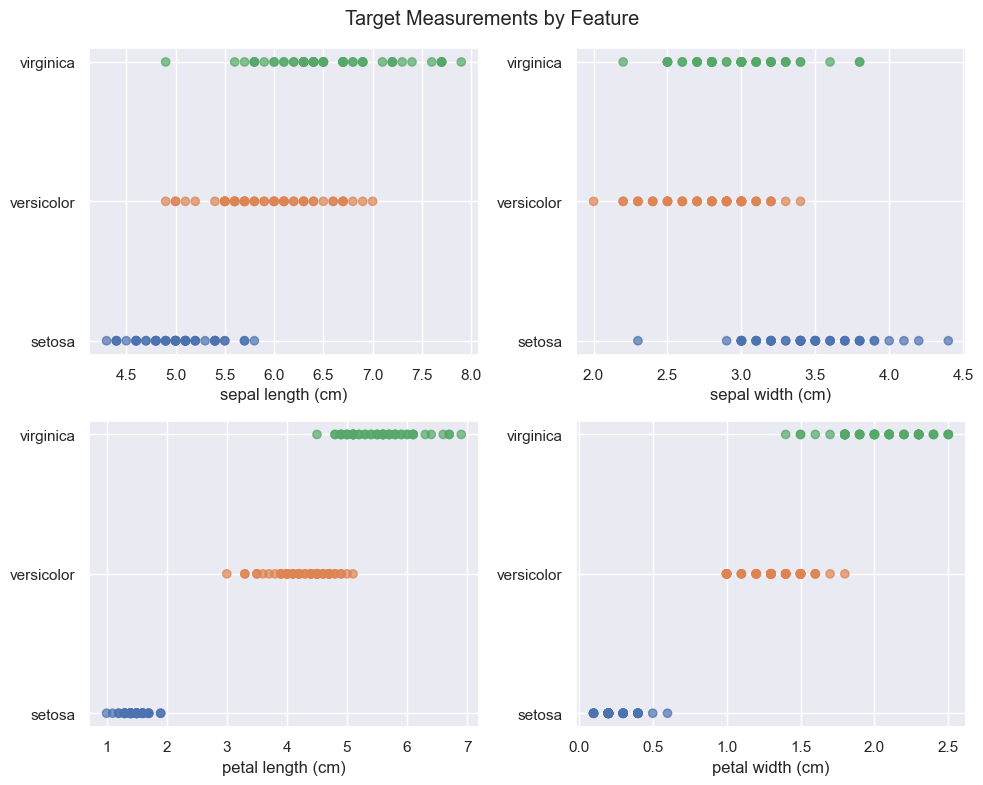

In [37]:
# Creating another grid for our scatterplots to situate
cols = ["sepal length (cm)", "sepal width (cm)", 
        "petal length (cm)", "petal width (cm)"]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))                       

# Implementing our Seaborn color scheme
palette = sns.color_palette()
species_colors = {0: palette[0], 1: palette[1], 2: palette[2]}

# Create a loop through which we run our features in each subplot position
for ax, col in zip(axes.ravel(), cols):
    ax.scatter(df[col], df["target_names"], c=df["target"].map(species_colors), alpha=0.7)
    ax.set_xlabel(col)
    ax.set_title("")          

# Create a title and neatly format our graphical output
plt.suptitle("Target Measurements by Feature")
plt.tight_layout()
plt.show()

These scatterplots *perfectly confirm* our initial observations which we made from the histograms earlier in the project, and additionally provide some *additional nuance and detail* we can take forward into the rest of the work. These observations include:
1. **Sepal length & width :** both graphs indicate significant overlap between our species types, indicating that they'll be of less value in our ensuing prediction models.
2. **Petal length:** three mostly overlaping bands (*setosa* < 2cm, 3 < *versicolor* < 5cm, *virginica* > 4.5cm. A single split based solely upon petal length would perfectly classify *setosa*, and be effective for the majority of our *versicolor* and *virginica* flowers too.
3. **Petal width:** like our petal length feature, petal width is incredibly informative as no species shares the same width range. Like petal length, petal width alone could perfectly classify *setosa*, and classify most of *versicolor* and *virginica* correctly too.

## **Exploratory Data Analysis Pairplots**

This section is the point in which our analysis transforms from **univariate** (focussing on how one feature relates with the target) to **multivariate**, where we uncover how the interaction between feature properties can further distinguish our data and aid our model.

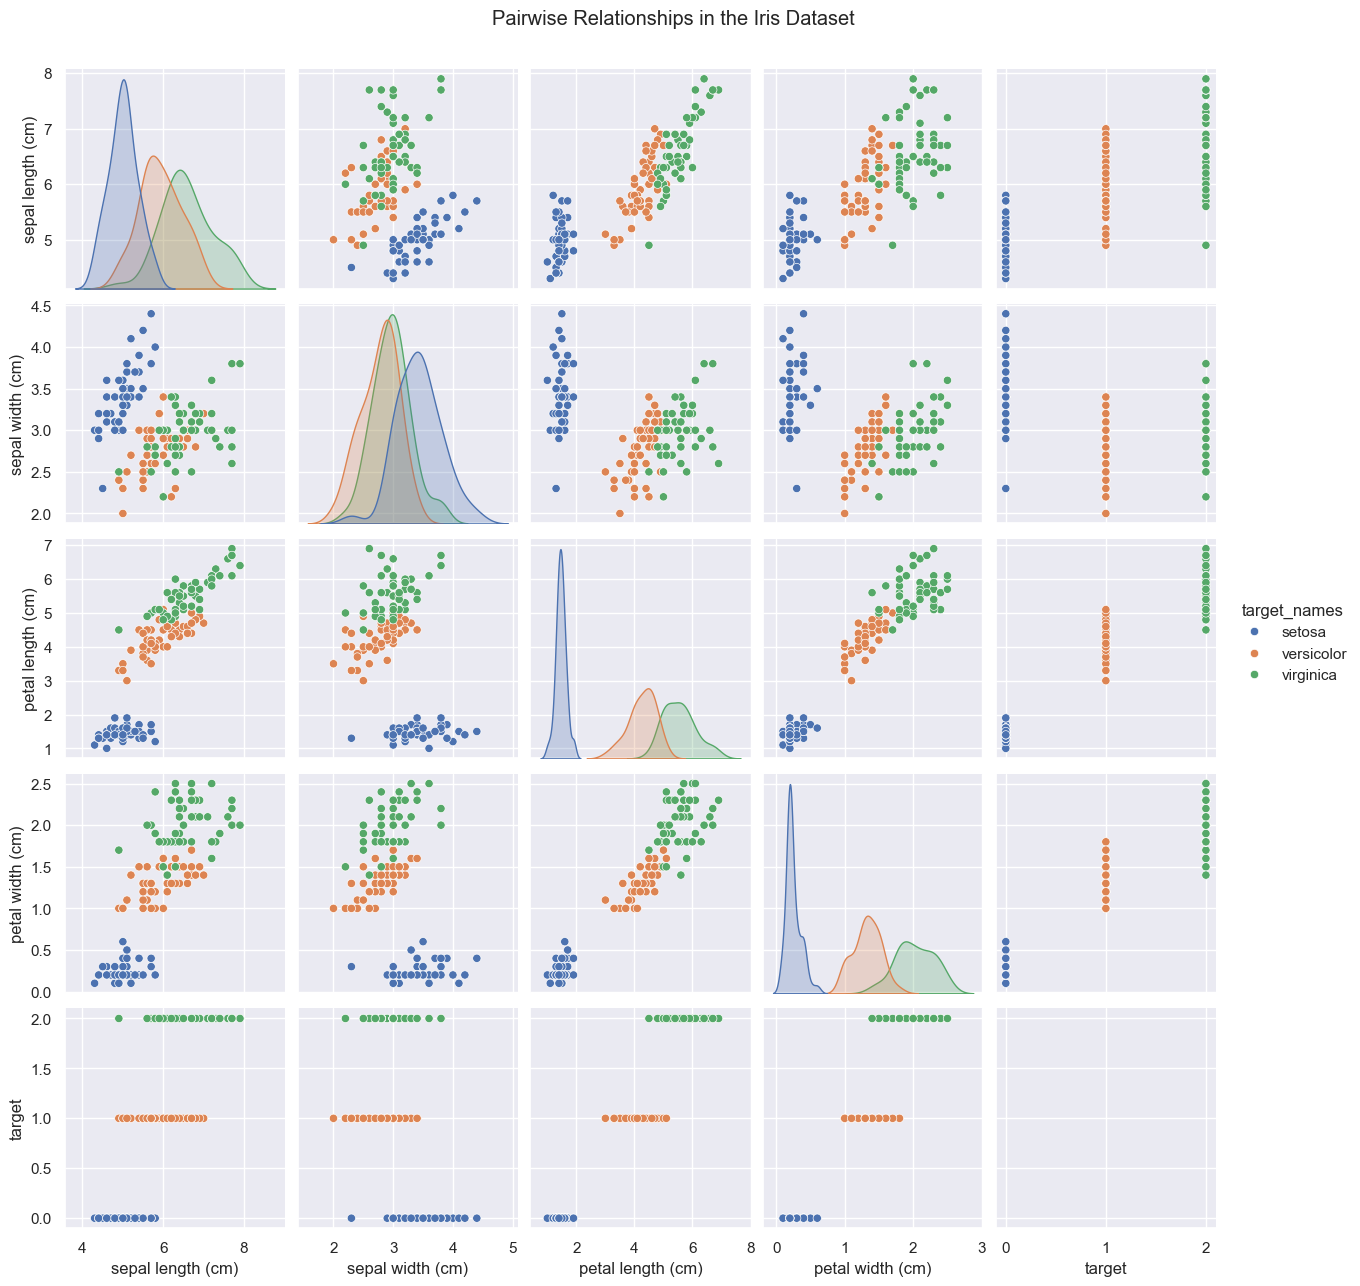

In [38]:
# Using Seaborn's 'pairplot' to create a visual display for our bivariate analysis
pairplot = sns.pairplot(df, hue="target_names")


# Create a title for our pairplot graphs
pairplot.fig.suptitle("Pairwise Relationships in the Iris Dataset", y=1.03)
plt.show()

This pairplot maps out the bivariate relationships within our data to brilliantly *reinforce* and *deepen* the conclusions we drew from the histograms and scatterplots earlier in the project, whilst further revealing the underlying relationships between each feature and how they can be used to *bolster the power of our model*. Key findings from the pairplot includes:
1. **Petal length vs. petal width:** this is our most revealing graph, displaying *three perfectly separated clusters*, and could likely be used to create a highly reliable model alone.
2. **Sepal features:** as mentioned earlier, the sepal features show *considerably less* separation between target groups, particularly for *versicolor* and *virginica* flowers, reinforcing that sepal features alone would likely fail to provide a good predictive model.
3. **Setosa's separability:** As we first observed in the scatterplot graphs, *setosa* remains *visibly separated* from the other species, particularly in regard to petal features.

## **Train Test Split**

To ensure proper practise and accurate training, we must separate our dataset into two subsets **training** and **testing**. To perform this, I install **scikit-learn's train_test_split**, which randomly allocates **80%** of my dataset to my training subset, and the remaining **20%** to my testing subset.

In [71]:
# Import the test_train_split model from libraries
from sklearn.model_selection import train_test_split

# Splitting our dataset into two subsets (80% : 20%), and ensuring a consistent shuffle every run
df_train, df_test = train_test_split(df, test_size=0.20, random_state=41)

In [72]:
# Ensuring that our subsets have the expected number of entries
df_train.shape

# 150 * 0.8 = 120

(120, 6)

In [73]:
df_test.shape

# 150 * 0.2 = 30

(30, 6)

In [74]:
# Confirmation that our training dataset looks as it should
df_train.head()

# Our test_train_split function also shuffles our dataentries, as seen below

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
79,5.7,2.6,3.5,1.0,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica
90,5.5,2.6,4.4,1.2,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica


## **Prepare the Dataset for Modeling**

In the last set we split our dataset into two. Now, it is required that we prepare our training subset **inputs (X)** and **outputs (y)** for the training of our model, where are inputs are all of our *features*, and the output is the *target* (or species name). 

In [75]:
# Preparing our X_train subset through dropping the target values and converting to a NumPy array
X_train = df_train.drop(columns=["target", "target_names"]).values
X_train[:5]

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3]])

In [76]:
# Extracting the numeric species target data for our output, y_train
y_train = df_train["target"]
y_train[:5]

79     1
54     1
106    2
90     1
145    2
Name: target, dtype: int64

In [77]:
# Repeat the process for the test set, which we will leave alone until the final test of the model
X_test = df_test.drop(columns=["target", "target_names"]).values
y_test = df_test["target"]

## **Modeling Manual Model**

The iris dataset consists of **150 samples**, *equally distributed* between **3 targets**. At a baseline, this means that you would expect at least a score of 0.33, or 33% - as this is the score you would get from answering the same answer for each instance. 

To show that this dataset can be much more effectively classified than that, I have here created a manual model which uses only 1 feature, **petal length**, we have already identified as being highly predictive. The simple model I create resembles a **decision tree**, and provides us with a useful **baseline accuracy** on the training set against which we will compare our **trained models**. 

In [78]:
# Creating our rule-based classifier using our single variable
def single_feature_predictor(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [79]:
# Apply our classifier to all training examples, using just the petal length column
manual_y_predictions = np.array([single_feature_predictor(val) for val in X_train[:, 2]])

In [80]:
# Compare our model's predictions with the true labels to compute it's accuracy
manual_model_accuracy = np.mean(manual_y_predictions == y_train)
print(f"Manual Model Accuracy: {manual_model_accuracy * 100 :.2f}%")

Manual Model Accuracy: 95.00%


This **simple classifier**, using just **petal length** and two hardcoded thresholds achieves an impressive **95% accuracy score** on the training set, confirming that **petal length** alone carries a very strong prediction power for the species type. 

However, though impressive, the *rigidity* and *manual tuning* of the model means that it lacks flexibility and robustness. This is something that the rest of this project will address, as we create more *complex* and *multidimensional* models to analyse and predict our data

## **Modeling our Logistic Regression**

Now that we have created our **univariate manual model**, we will move onto creating a *more complex*, and hopefully *more accurate* predictor. The model that we are going to use is a **Logistic Regression classifier**, which will learn the optimal weights for **every feature and class** - not just petal length. As our dataset contains three target types, our model will automatically apply a **multinomial (softmax) logistic regression**.

In [81]:
# Import LogisticRegression model from our library
from sklearn.linear_model import LogisticRegression

# Initialisation of our model with default parameters
model = LogisticRegression()

In [82]:
# Fit our model to the training data subset
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Score our baseline Logistic Regression model on the witheld test set
model.score(X_test,y_test)
print(f"Baseline Logistic Regression Accuracy: {model.score(X_test,y_test)}%")

Baseline Logistic Regression Accuracy: 0.9333333333333333%


Our **baseline logistic regression model**, that is our non cross-validated and untuned model, scored only **93.33%** on our witheld test set which we separated using **train_test_split**. This is a lower score, than we received from our crude **manual prediction model** that we showcased earlier, showing that there is perhaps **room to further optimise the model**. To do such, we will introduce further measures, such as **cross-validation** and **hyperparameter tuning** to optimise our model and increase its **accuracy** on the unseen data.

## **Introducing Cross Validation**

Rather than relying on a single train/test split, for our linear regression model we want to apply **k-fold cross-validation**, which will evaluate our model over multiple training/validation splits, leading to more *robust* and *accurate* scores.

In this instance, we will use a **5-fold CV**, implying that our training data is split into **5 parts**. Of these 5 parts, the model is trained on 4 folds, and validated on the 5th. This process is repeated 5 times, with each fold getting the chance to serve as the validation set. With our results from the **5-fold CV**, we will compute the **mean accuracy** and **standard deviation** to derive a *stable* and *realistic* estimate of our model's performance.

In [84]:
# Importing our cross-validation tools from our scikit-learn import
from sklearn.model_selection import cross_val_score, cross_val_predict

# Complete a reinitialisation of our linear regression model with default parameters
model = LogisticRegression()

In [85]:
# Perform our 5-fold cross validation on our training dataset
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [86]:
# Show each fold's separate accuracy
display(accuracies)

# Here we can see that two instances were 100% correctly predicted, and the other two likely had 1-2 failures.

array([0.91666667, 0.95833333, 0.95833333, 1.        , 1.        ])

In [87]:
# Print our average accuracy and variability across the 5 folds for our cross validated score
print(f"Cross Validated Accuracy: {accuracies.mean() * 100 :.2f}% +/- {accuracies.std() :.2f}")

Cross Validated Accuracy: 96.67% +/- 0.03


The **mean cross-validated accuracy** of our model turns out to be an impressive **96.67%**, with an equally impressively **low standard deviation (0.03)**, confirming that our model is both *accurate* and *stable* across our training dataset. Further, a mean score of **96.67%** is an improvement upon our manual model's basline score of **95%**, and un-cross-validated score of **93.33%** showing that our logistic regression model performs *consistently better*, and that our **cross-validation** was effective at increasing it's predictive scope.

## **Model Misclassifications**

A useful insight into the workings of our model is provded by seeing where it makes mistakes. Like our previous usage of the **cross_val_score** tool from **scikit-learn**, we will employ the tool **cross_val_predict** to simulate how the model performs on unseen data. Following this, we will **flag** whether each prediction was *right or wrong*, and *visualise* these patterns using our key features - namely **petal length** and **petal width**.

This analysis will allow us to spot **systematic errors** within our model, such as consistent confusion, and help us to tailor it and improve it's predictive powers.

In [88]:
# Create cross-validated predictions for our training set
y_predictions = cross_val_predict(model, X_train, y_train, cv=5)

# Use mask to identify our correct predictions
predicted_correctly_mask = y_predictions == y_train

In [89]:
# Create an inverse of our mask to show only our incorrect predictions
not_predicted_correctly = ~predicted_correctly_mask
X_train[not_predicted_correctly]

# 4 rows of codes suggests 4 incorrect predictions, with each number representing a feature value

array([[4.9, 2.5, 4.5, 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7]])

In [90]:
# Save a copy of our updated prediction dataframe
df_predictions = df_train.copy()

In [91]:
# Create new columns for our dataset to idenfity what our model predicted and whether it was correct
df_predictions["correct_prediction"] = predicted_correctly_mask
df_predictions["prediction"] = y_predictions

In [92]:
# Map our numeric predictions of species type into their respective names
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1:"versicolor", 2:"virginica"})

In [93]:
# Inspect our table to see the new headings appended on the right
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_prediction,prediction,prediction_label
79,5.7,2.6,3.5,1.0,1,versicolor,True,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor,True,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica,False,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor,True,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica,True,2,virginica


In [94]:
# Define a custom function to plot our prediction vs. true labels
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots (1, 2, figsize=(10,4))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_names", data=df_predictions, ax=axs[1])

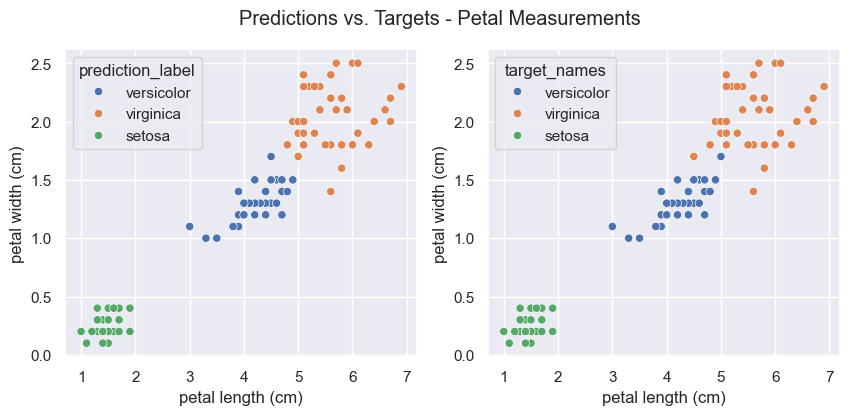

In [95]:
# Use our function to plot the graphs with petal features on the axes
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

# Create a title and display our scatterplots
plt.suptitle("Predictions vs. Targets - Petal Measurements")
plt.show()

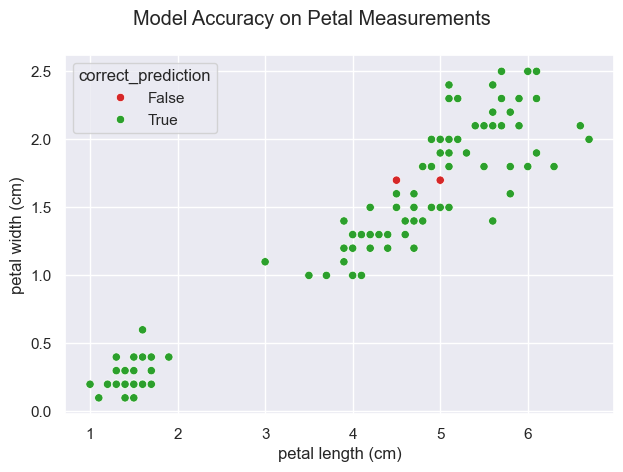

In [52]:
# Creating another scatterplot which highlights the model's predictive successes in green and errors in red
sns.scatterplot(data=df_predictions, x="petal length (cm)", y="petal width (cm)", hue="correct_prediction", palette={True: "tab:green", False: "tab:red"})

# Creating a title and layout for our graph
plt.suptitle("Model Accuracy on Petal Measurements")
plt.tight_layout()
plt.show()

The 3 graphs above show us the **discrepancies** between our *model's predictions*, and the *actual species names* for our dataset. As expected, the *setosa* flowers were predicted correct **100%** of the time, creating a successful cluster in the bottom left of our graphs. In general, our model has predicted between *versicolor* and *virginica* reasonably successfully, only making mistakes in the overlapping region of the species. Lastly, there are no wild outliers from our dataset where our model has been found **dramatically incorrect**, reinforcing our idea that it is both *robust* and *generalisable*.

***Note:** You will see that in our cross_val_score, there were 4 incorrect predictions, but that it looks like only 2 are represented on our graphs. This is because our incorrect values of - (5.9, 3.2, 4.8, 1.8), (6.2, 2.8, 4.8, 1.8) - had petal measurements which were both identical eachother (4.8, 1.8) and to another True value, which supplanted our False plots.*



## **Model Tuning**

We have already trained our **cross-validated Logistic Regression model**, and have achieved an *impressive* accuracy score of **96.67%** on our training data. Now, to squeeze yet *further performance* from our model, we will explore the realm of **hyperparameter optimising**.

Here, we will use scikit-learn's **GridSearchCV** tool to test our hyperparameter combinations. In particular, we will tune:
1. **C:** the regularisation strength
2. **max_iter:** the number of iterations allowed for convergence

Further, we will take this opportunity to **evaluate** our model on multiple metrics. These metrics are:
1. **R2:** coefficient of determination
2. **RMSE:** root mean squared error
3. **MAE:** mean abolute error

Through once again taking a **5-fold cross-validation** on our training set, we will be able to optimise out model further, identifying the hyperparameter options that maximise our model's accuracy.

In [96]:
# Import GridSearchCV tool from scikit-learn
from sklearn.model_selection import GridSearchCV

In [100]:
# Reinstantiate our logistic regression
model = LogisticRegression()

# Define our hyperparameter grid to test
param_grid = {
    'C': [0.125, 0.25, 0.5],
    'max_iter': [100, 150, 200]
}

# Define our multiple scoring metrics
scorers = {
    'R2': 'r2',
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error'
}

# Configure our GridSearch tool to our dataset, refitting to sort from best R2 values
model_GS = GridSearchCV(model, param_grid=param_grid, cv=5, refit='R2', 
                        scoring=scorers, return_train_score=True)

# Fit our GridSearchCV tool to our training data
model_GS.fit(X_train, y_train)

# Find our optimal parameters for C and max_iter
print(f"Logistic Regression Best Parameters: {model_GS.best_params_}")

Logistic Regression Best Parameters: {'C': 0.25, 'max_iter': 100}


Here, we can see that our model's optimal parameters for our training set are C = 0.25, and max_iter = 100. It is important to check both sides of these parameters to ensure that these parameters do represent the optimal settings. This has clearly been done on **C**: **0.125 < 0.25 < 0.5**. For **max_iter** however, we were unable to test at **max_iter < 100**, as it did not provide convergence in the dataset, and therefore we have taken **max_iter = 100** as it was the lowest, still converging, value.

In [101]:
# Create a fresh DataFrame to showcase the results from our hyperparameter tuning
results = pd.DataFrame(model_GS.cv_results_).sort_values('rank_test_R2')
display(results[['param_C', 'param_max_iter', 'mean_test_R2', 'mean_test_RMSE', 'mean_test_MAE']])

,param_C,param_max_iter,mean_test_R2,mean_test_RMSE,mean_test_MAE
3,0.250,100,0.9500,-0.139385,-0.033333
6,0.500,100,0.9500,-0.139385,-0.033333
5,0.250,200,0.9500,-0.139385,-0.033333
4,0.250,150,0.9500,-0.139385,-0.033333
7,0.500,150,0.9500,-0.139385,-0.033333
8,0.500,200,0.9500,-0.139385,-0.033333
0,0.125,100,0.9375,-0.180210,-0.041667
2,0.125,200,0.9375,-0.180210,-0.041667
1,0.125,150,0.9375,-0.180210,-0.041667


In [112]:
# Use our best parameters found from the tuning to reinitiate the logistic regression function
model = LogisticRegression(max_iter=100, C=0.25)

In [113]:
# Calculate our tuned model's accuracy and reliability on the training set
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Final Tuned Accuracy: {accuracies.mean() * 100 :.2f}% +/- {accuracies.std() :.2f}")

Final Tuned Accuracy: 96.67% +/- 0.03


From the DataFrame above, we can see that our best **R2** score is **consistent across our changing parameters** as we have scores of **0.95** for **6 iterations** of our testing. Going further, we can see that our parameter **max_iter** has little impact on our **R2** score, with each value averaging the same score. In contrast, we can see that our parameter **C** does contribute to the **R2** score, with **C = 0.25** and **C=0.5** both scoring **R2 = 0.95** on every given iteration. Mirroring trends emerge when analysing our **RMSE** and **MAE** scores, reinforcing the findings of our model tuning process.

Upon using the optimal features, *checked for all optimal **C** and **max_iter** values previously outlined*, we tested the accuracy of our model on the training set for the final time. In this test, our model scored **96.67%** again, and had a similarly idential variance as our pre-tuned model too. This suggests that our **Logistic Regression** model was already performing near-optimally, and that improvements from the **hyperparameter tuning** were minimal, and in this instance, unnoticable.

## **Final Modeling**

We are now at the **final part** of this project. We have already succesfully **cross-validated our model** and **selected our hyperparameters** and will now take this expertise into a final model performance examination on the **witheld test data**. This process is a nexessary one in this project, as testing our model on unseen data in this way will ensure that the model **effectively generalises**, and that it's success on the training data was not due to **overfitting**.

In [115]:
# Redefine our logistic regression function with our optimised hyperparameters
model = LogisticRegression(max_iter=100, C=0.25)

In [117]:
# Fit our model onto our training set data
model.fit(X_train, y_train)

LogisticRegression(C=0.25)

In [118]:
# Generate our model's predicted labels for the test set data
y_test_predictions = model.predict(X_test)

In [119]:
# Comparing our model's predicted label with the actual labels and generating an accuracy score
test_set_correctly_classified = (y_test_predictions == y_test)
test_set_accuracy = np.mean(test_set_correctly_classified)

In [120]:
# Display the final test set accuracy
print(f"Final Model Test Set Accuracy: {test_set_accuracy.mean() * 100 :.2f}%")

Final Model Test Set Accuracy: 93.33%


For our final testing on the **witheld test data**, our model scores a **93.33%** accuracy. This score is slightly lower than that of our previous models tested on the training data. This could suggest either that our test data had more **noise** and **variance** than our training data (making predictions less informed), or that our model was **overfitted** to our training set (perhaps due to our values for **C** being too large). Overall though, a drop in only **3.33%** is rather minimal, and accounts for only 1 additional incorrect prediction, showing that our model is still certainly *robust* and *effective*, and can accurately predict the flower type based off of its features.

In [126]:
# Create a copy of the test set
df_predictions_test = df_test.copy()

In [127]:
# Annotate our predictions_test DataFrame with our model's prediction information
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_predictions
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "setosa", 1:"versicolor", 2:"virginica"})

In [128]:
# Visually inspect the newly appended columns
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_prediction,prediction,prediction_label
119,6.0,2.2,5.0,1.5,2,virginica,False,1,versicolor
128,6.4,2.8,5.6,2.1,2,virginica,True,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica,True,2,virginica
91,6.1,3.0,4.6,1.4,1,versicolor,True,1,versicolor
112,6.8,3.0,5.5,2.1,2,virginica,True,2,virginica


In [130]:
# Display only our incorrect predictions from the test set data
df_predictions_test[~df_predictions_test["correct_prediction"]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_prediction,prediction,prediction_label
119,6.0,2.2,5.0,1.5,2,virginica,False,1,versicolor
83,6.0,2.7,5.1,1.6,1,versicolor,False,2,virginica


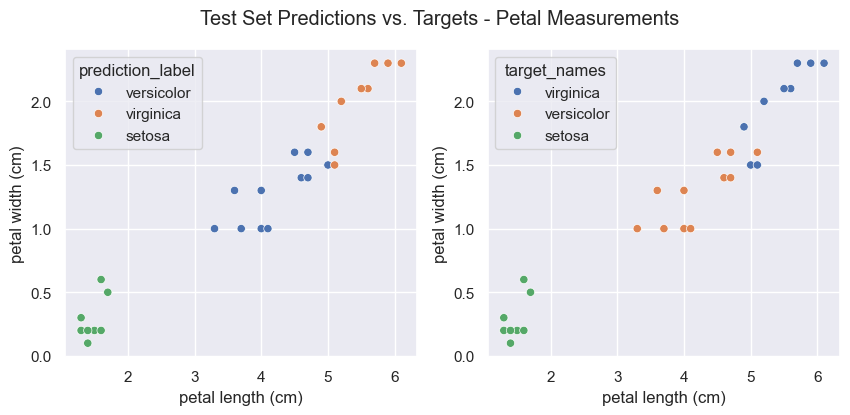

In [124]:
# Create side-by-side scatterplots again, this time comparing our model's predictions on just the test set
plot_incorrect_predictions(df_predictions_test, x_axis_feature="petal length (cm)", 
                           y_axis_feature = "petal width (cm)")

# Create a title and display our scatterplots
plt.suptitle("Test Set Predictions vs. Targets - Petal Measurements")
plt.show()

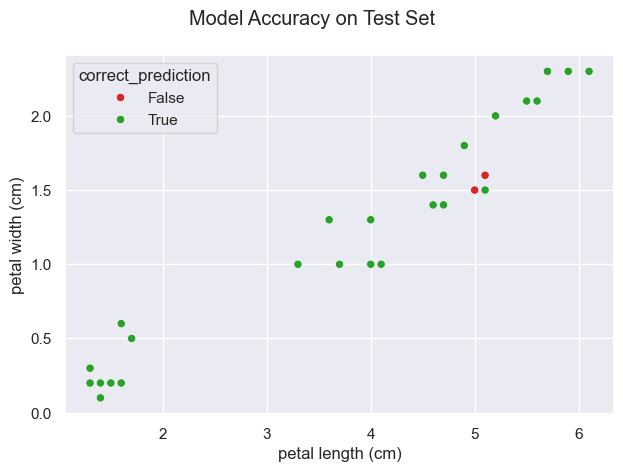

In [125]:
# Create a final scatterplot with our incorrect predictions highlighted in red
sns.scatterplot(data=df_predictions_test, x="petal length (cm)", y="petal width (cm)", 
                hue="correct_prediction", palette={True: "tab:green", False: "tab:red"})

# Display our scatterplots with a title and clean layout
plt.suptitle("Model Accuracy on Test Set")
plt.tight_layout()
plt.show()

As seen with an accuracy score of **93.33%** - *equivalent to 28/30 correct predictions* - this model was certainly effective at predicting the species type for our witheld test set values. Looking at the three displayed scatterplots above, *similar patterns emerge* as to what we saw earlier with our training set visualisations - *setosa* in a separable cluster in the bottom left, and a slight overlap between the *versicolor* and *virginica* dataset entries. The two incorrect instances from our models are represented in the following vectors - (6.0, 2.2, 5.0, 1.5), (6.0, 2.7, 5.1, 1.6). The feature values of each incorrect prediction are within this aforemntioned **overlap** between our *versicolor* and *virginica* species, which shows that the misclassification of our model was an easily-made mistake and it wasn't due to an explicit mistake in it's formulation.

## **Key Takeaways**

This project began with the simple aim of **building a predictive model** centered upon the *classic* **Iris Flower Classification** dataset, where we use four key measurements - *petal length*, *petal width*, *sepal length*, *sepal width* - to predict the species of our iris flower (*setosa*, *versicolor*, and *virginica*). Across the project, we undertook tasks including:
1. **Environment & Library Setup:** 
2. **Loading & Exploring the Dataset:** reviewing its structure and summarising its statistics, identifying both *petal length* and *petal Width* as our critical features
3. **Visualising the Feature Distributions:** created histograms and scatterplots to visualise the relationships between our features and target variable
4. **Engineering our Train-Test Split:** split our data into a 80/20 training and testing split with a fixed random seed
5. **Built a Baseline Manual Model:** used simple thresholds on just *petal length* to classify species, scoring **95%** accuracy 
6. **Trained a Logistic Regression Model:** scoring 93.33% on the dataset, showing that it was near-optimal capacity in even this first instance.
7. **Performed Cross-Validation & Hyperparameter Tuning:** validated the consistency of our model, but little in the way of improvement reinforces our idea that it was already almost optimal
8. **Final Modeling on Witheld Test Set:** a final modeling with our fully hyperparametised and cross-validated model, giving us a final accuracy score on the unseen test set of **93.33%**, or *28/30 correct predictions*

Overall, this project had been incredibly informative and has certainly progressed my development in the field of data science and machine learning. It effectively demonstrated the full machine learning workflow, from *data exploration* to *model hyperparameter tuning*. Our logistic regression model, despite its simplicity and intuitive nature, proved to be a highly effective classifier for this dataset due to the strength of 2 particular features - *petal length* and *petal width*. Overall, our efforts here have effectively created a predictive model which is both **generalisable** and **high-performing**, and I personally look forward to my next data science endeavour.